# Project: The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#properties">General Properties</a></li>
        <li><a href="#cleaning">Data Cleaning</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
        <li><a href="#question1">Research Question 1</a></li>
        <li><a href="#question2">Research Question 2</a></li>
        <li><a href="#question3">Research Question 3</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The purpose of this report is to document the steps taken in this project such as inspecting the dataset, cleaning the dataset, analyzing the dataset, visualizing the dataset, and answering the questions. The Movie Database was selected for this project and it contains about 10,000 movies and information related to each movie such as the cast, genre, title, revenue. This report will try to answer the following questions:
><ol>
    <li><a href="#question1">What properties are associated with popular movies?</a></li>
    <li><a href="#question2">Do movies with a higher budget receive better vote average?</a></li>
    <li><a href="#question3">Do movies with a lower budget receive lower revenue?</a></li>
</ol>

In [1]:
# import statements for required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

<a id='properties'></a>
### General Properties

In [2]:
# loading the data into a dataframe
df = pd.read_csv('tmdb-movies.csv')
# inspecting the data for missing values
df.info()
#cast, imdb_id, director, genres, homepage, tagline, keywords, overview, production_companies missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>After loading the dataset it was checked for missing information and the output above shows that the cast, imdb_id, director, genres, homepage, tagline, keywords, overview, and production_companies column have missing values.

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Looking at the table above it seems like the columns popularity, budget, and revenue have a 0 value in more than half the rows. Therefore, since there are too many 0 values in these columns and to get a better visualization of the data these rows will be treated as missing values and will be dropped.

In [4]:
# Getting the number of duplicated rows
print("Number of duplicated rows:", sum(df.duplicated()))
# Getting the number of rows with missing values for each column
print(df.isna().sum())
df.shape

Number of duplicated rows: 1
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


(10866, 21)

>The dataset was checked for any duplicate rows or rows with missing values and the output above shows that there is one duplicated row and a maximum of 7930 rows with missing values out of 10866 rows. The columns with the most missing values are homepage, tagline, keywords, and production companies and due to the lack of data in those columns they will be dropped.

<a id='cleaning'></a>
### Data Cleaning

In [5]:
# Drop columns that aren't used for this analysis
df.drop(['id', 'imdb_id', 'homepage', 'director', 'tagline', 'cast', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
# Drop duplicated rows
df.drop_duplicates(inplace=True)
# Drop rows with missing values
df.dropna(axis=0, inplace=True)
# Drop rows with a value of 0 in the three columns: popularity, budget, and revenue
df = df[df.popularity != 0]
df = df[df.budget != 0]
df = df[df.revenue != 0]

In [6]:
# Checking the result of performing the data cleaning operations
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Since the id, imdb id, homepage, director, tagline, cast, keywords, overview, and production companies columns are not related to the questions this analysis tries to answer they are dropped from the dataset. Moreover, duplicated rows and rows with missing values or values of 0 in either the popularity column, revernue column, or budget column are dropped.

In [7]:
# Checking how the numerical values changed after cleaning the data
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### Research Question 1: What properties are associated with popular movies?

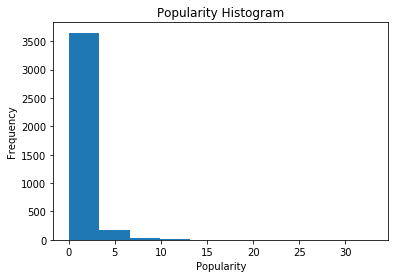

In [8]:
plt.hist(df.popularity)
plt.title("Popularity Histogram")
plt.xlabel("Popularity")
plt.ylabel("Frequency");

>Looking at the histogram of popularity for the movies, it seems like most movies have a popularity value between 0 and 5, while very few movies have a popularity value of up to 30.

In [9]:
high_popularity = df.query('popularity >= popularity.mean()')
low_popularity = df.query('popularity < popularity.mean()')
high_budget = df.query('budget >= budget.mean()')
low_budget = df.query('budget < budget.mean()')

# A function that will plot a bar graph with tick labels, title, x axis label, and y axis label.
def plotbar(high, low, high_label, low_label, title, x, y):
    plt.bar([1, 2], [high.mean(), low.mean()], tick_label=[high_label, low_label])
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y);

>The data is divided into two groups by the median of popularity once and again by the median of budget to compare between high popularity movies, low popularity movies, high budget movies, and low budget movies with other properties and a function called "plotbar" was defined to easily create bar graphs with labels and a title.

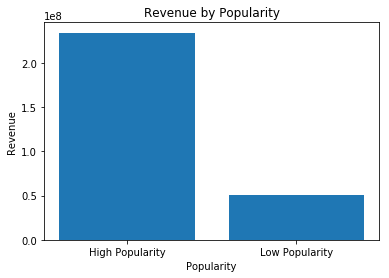

In [10]:
plotbar(high_popularity['revenue'], low_popularity['revenue'], 'High Popularity', 'Low Popularity', 'Revenue by Popularity', 'Popularity', 'Revenue')

>First, I am looking into the relationship of popularity and revenue using a bar chart and according to the bar chart above popular movies have a higher revenue than movies with low popularity.

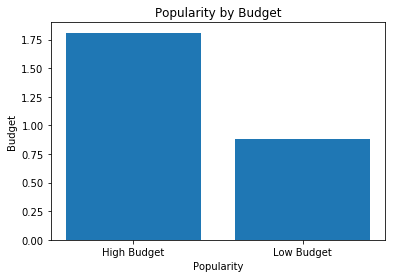

In [11]:
plotbar(high_budget['popularity'], low_budget['popularity'], 'High Budget', 'Low Budget', 'Popularity by Budget', 'Popularity', 'Budget')

>Also, according to the graph above movies with high budget have a higher popularity than movies with a lower budget.

## <a id='question2'></a>
### Research Question 2: Do movies with a higher budget receive better vote average?

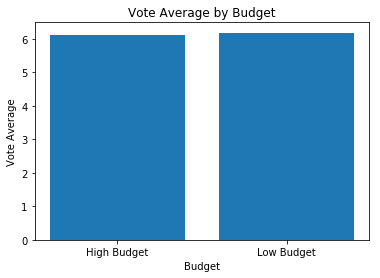

In [12]:
plotbar(high_budget['vote_average'], low_budget['vote_average'], 'High Budget', 'Low Budget', 'Vote Average by Budget', 'Budget', 'Vote Average')

>In this section the budget and vote average are being investigated to see if a higher budget results in a higher vote average and in order to do that I have decided to divide the data into two groups by the median of the budget, one for movies with a high budget and another for movies with a low budget and then creating a bar chart to see how they compare to each other. In the bar chart above it seems like both groups have about the same vote average.

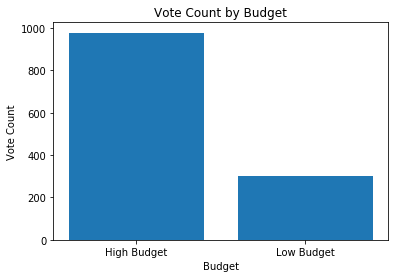

In [13]:
plotbar(high_budget['vote_count'], low_budget['vote_count'], 'High Budget', 'Low Budget', 'Vote Count by Budget', 'Budget', 'Vote Count')

>However, in the graph above movies with a low budget have a lower vote count than movies with a high budget.

<a id='question3'></a>
### Research Question 3: Do movies with a lower budget receive lower revenue?

In [ ]:
plotbar(high_budget['revenue'], low_budget['revenue'], 'High Budget', 'Low Budget', 'Revenue by Budget', 'Budget', 'Revenue')

>According to the graph above movies with a high budget have a higher revenue than movies with a lower budget.

<a id='conclusions'></a>
## Conclusions
>In conclusion, movies with high popularity have a higher revenue and higher budget than movies with a low popularity, and movies with a high budget have a high revenue, but even though movies with a low budget have lower vote count they still have a vote average close to movies with a high budget. Note that the dataset was not explored to its fullest, maybe genres contribute to the popularity of a movie, or the cast contributes to the revenue of the movie.

### Limitations
>The dataset used in this analysis had more than 50% rows with 0 values in three columns: popularity, revenue, and budget, which affected the accuracy of the graphs because when the bar charts were graphed the bars had a height of 0. Therefore, I had to drop those rows and treat them as missing data to get better visualization of the data.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])